<h1 style='text-align:center'> Data Visualizations with Matplotlib <h1/>

# Starting Off:

Why would we use data visualizations in our presentations?

<img src='images/marshall.gif'/> 

## Why is Data Visualization Important?

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
aq = pd.read_csv('aq.csv')

In [3]:
aq.describe()

,x1,x2,x3,x4
count,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000
std,3.316625,3.316625,3.316625,3.316625
min,4.000000,4.000000,4.000000,8.000000
25%,6.500000,6.500000,6.500000,8.000000
50%,9.000000,9.000000,9.000000,8.000000
75%,11.500000,11.500000,11.500000,8.000000
max,14.000000,14.000000,14.000000,19.000000


##### Graphs

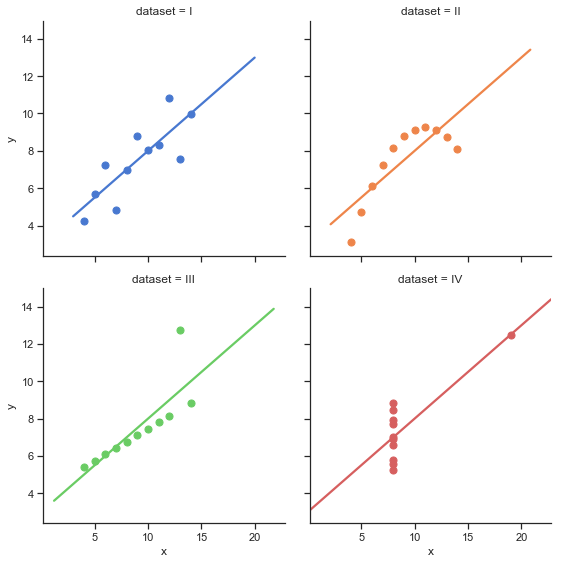

In [4]:
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

<img src='images/notsurprisedkirk.jpg' width=500/>

Data visualizations can help to provide more insight to a data set than what our descriptive statistics give us.  

## Matplotlib

In [5]:
import matplotlib.pyplot as plt
import numpy as np #good for creating fake data
%matplotlib inline

Matplotlib is a complex library (70,000 + lines of code!). In order to best understand how it creates graphs it's important to understand how objects are structured in matplotlib. 

<img src='images/fig_map.webp'/>

### Two Ways to Generate a Single Plot

https://realpython.com/python-matplotlib-guide/

### Using plt.plot()

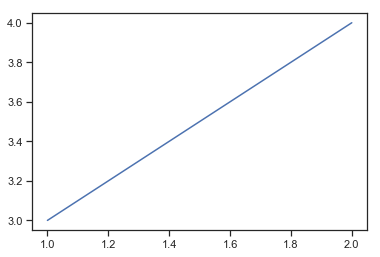

In [6]:
plt.plot([1,2], [3,4]) #1 and 2 are the x variables, 3 and 4 are the y variables


### Using plt.subplots()

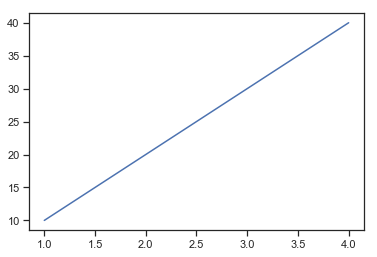

In [7]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4], [10,20,30,40])
# plt.show()

#### How do we add information to the above plot? 

Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels. 

<img src="https://matplotlib.org/3.1.1/_images/anatomy.png" alt="anatomy" title="Anatomy of Figure" width="650" />

There are methods for each one of these elements that allow you to grab them and customize your graph. 

In [8]:
ax.set_title('Line Graph')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')


Text(3.200000000000003, 0.5, 'Y Axis')

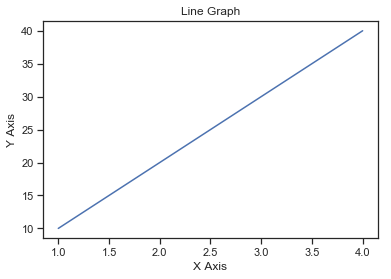

In [9]:
fig

You can add multiple lines to the same plot by calling a plotting method on the same ax. 

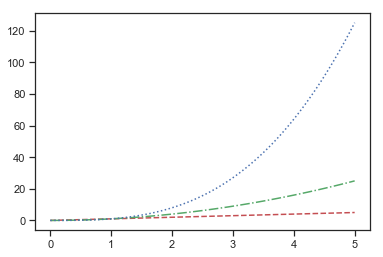

In [10]:
fig, ax = plt.subplots()
x = np.linspace(0, 5, 100)

ax.plot(x, x, label='linear', color='r', linestyle='dashed')
ax.plot(x, x**2, label='quadratic', color='g', linestyle='dashdot')
ax.plot(x, x**3, label='cubic', color='b', linestyle='dotted')


https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html

## Using Documentation:

The documentation is extremely confusing and can be difficult to find what you are looking for

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

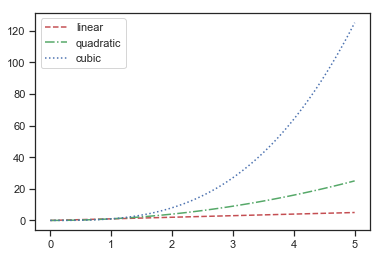

In [13]:
ax.legend()
fig

Search through the documentation and find how to add a legend to the the graph above.

### Create a Figure with 2 Axes(Plots) 

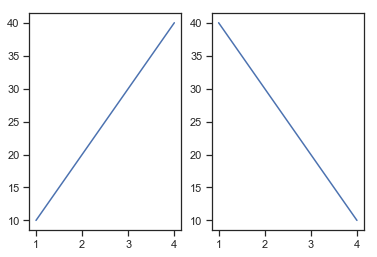

In [14]:
fig, ax = plt.subplots(1,2)
ax[0].plot([1,2,3,4], [10,20,30,40])
ax[1].plot([1,2,3,4], [40,30,20,10])

#### Create a figure with 3 rows and two columns of plots

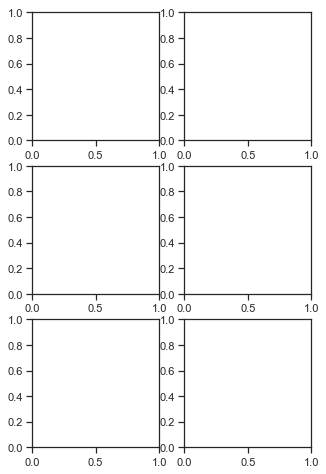

In [15]:
fig, axes = plt.subplots(3,2, figsize=(5, 8))

In [20]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16e55da0>,
      dtype=object)

Create some data to plot

In [21]:
# Use Numpy to create a list of numbers
# then transform those numbers using the sin function
x = np.linspace(0, 10, 100)
y = np.sin(x)

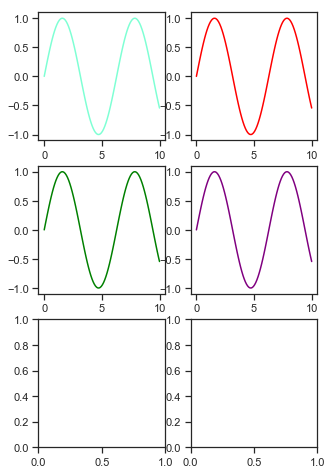

In [26]:
axes[1][1].plot(x,y, color='purple')
fig

#### Add the same chart to the second  row and first column

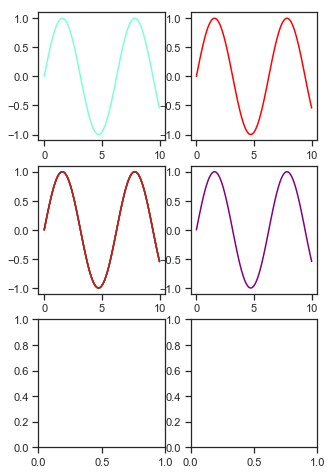

In [29]:
axes[1][0].plot(x, y, color='brown')
fig

#### Now lets add a title for the graph we just created? 

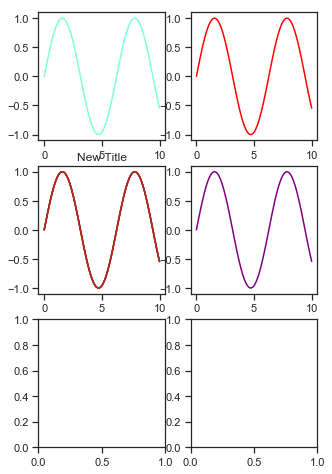

In [33]:
axes[1][0].set_title('New Title')
fig


We can also add a title to the entire figure

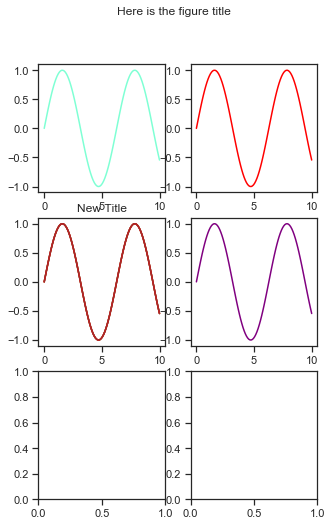

In [35]:
fig.suptitle('Here is the figure title')
fig

### Defining a function to Plot graphs:

Often when you are exploring your data you will create multiple graphs to look at many different variables. If you create a function at the beginning, you can say time from constantly copying and pasting.

In [36]:
 # Define a function called plot_timeseries
def plot_timeseries(axes, x_data, y_data, color):

  # Plot the inputs x,y in the provided color
  axes.plot(x_data, y_data, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

### Using the function:

Create a figure and axes to feed the function. 

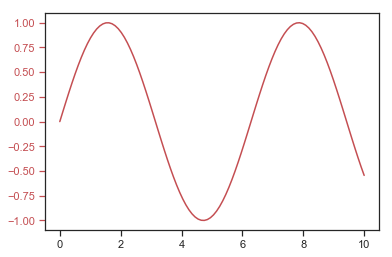

In [37]:
fig, ax = plt.subplots()

plot_timeseries(ax, x, y, 'r')

Now create your own function that also takes a title, x_label and y_label and adds those to the grap as well

In [48]:
 # Define a function called plot_timeseries
def plot_timeseries(axes , title, x_data, y_data, color, x_label, y_label):

# Plot the inputs x,y in the provided color
    axes.plot(x_data, y_data, color=color)

# Set the x-axis label
    axes.set_xlabel(x_label)

# Set the y-axis label
    axes.set_ylabel(y_label, color=color)
    
# Set title
    axes.set_title(title)
    
# Set the colors tick params for y-axis
    axes.tick_params('y', colors=color)

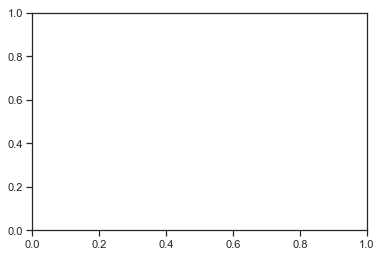

In [49]:
fig, ax = plt.subplots()

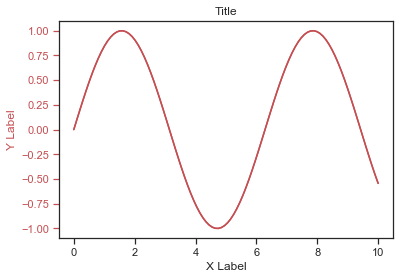

In [51]:
plot_timeseries(ax, 'Title', x, y, 'r', 'X Label', 'Y Label')
fig

#### Create a new fig and ax and call your updated function using these new objects

### Adding multiple axis to the same graph

In [52]:
#create a new set
y_2 = np.cos(x)

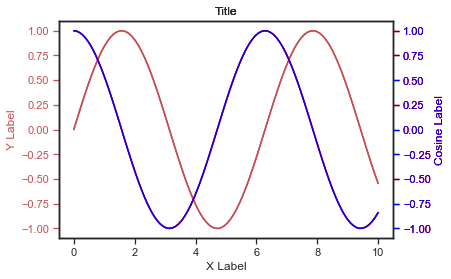

In [55]:
# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, 'Title', x, y_2, "blue", "X Label", "Cosine Label")

plt.show()

fig

## Seaborn

Seaborn is built on top of Matplotlib. Seaborn adds some styling to existing matplotlib graphs as well as adds some additional graphing capabilities. 

In [56]:
import seaborn as sns
sns.set()

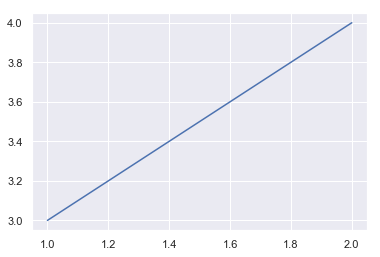

In [57]:
plt.plot([1,2], [3,4])

The most useful aspect of seaborn is that it allows you to use Pandas DataFrame Objects directly. 

In [58]:
#loads tips dataset
tips = sns.load_dataset("tips")

In [59]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


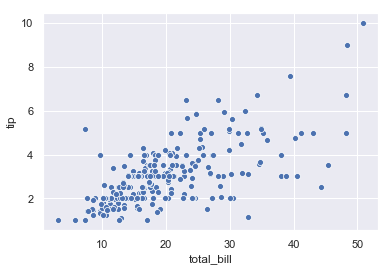

In [60]:
sns.scatterplot('total_bill', 'tip', data=tips)

## Resources

- https://www.ted.com/talks/david_mccandless_the_beauty_of_data_visualization#t-503926
- https://realpython.com/python-matplotlib-guide/ 
- https://www.darkhorseanalytics.com/blog/data-looks-better-naked/ 



- https://pudding.cool/
- http://setosa.io/#/